# Fase 1: EDA y limpieza de datos.

## ÍNDICE
1. EDA
- 1.1. Exploración de datos
  - 1.1.1. Análisis inicial
  - 1.1.2. Revisión de columnas
- 1.2. Eliminación de datos
2. Tratamiento de nulos
- 2.1. Numéricas
  - 2.1.1.  Hourly_Rate
  - 2.1.2.  Monthly_Income
  - 2.1.3.  Performance_Rating
  - 2.1.4.  Total_Working_Years
  - 2.1.5.  
- 2.2.  Categóricas
   - 2.2.1.  Business_Travel
   - 2.2.2.  Education_Field
   - 2.2.3.  Marital_Status
   - 2.2.4.  Overtime
3.  Estructura del dataframe
- 3.1. Modificación de columnas
- 3.2. Modificación del **tipo** de dato
  - 3.2.1. Cambio del tipo
  - 3.2.2. Redondear cifras
  - 3.2.3. Errores gramaticales
  - 3.2.4  Valores incorrectos
4. Duplicados
5. Employee_Number
- 5.1. Gestión de nulos

_NOTA: Las columnas serán renombradas al final del documento. Sin embargo, el índice se realiza en base al nombre final que recibirán las mismas._

____________________________________________________________________________________________________________________________

## **1. EDA**

### 1.1. Exploración de datos

In [1]:
# Importamos lo que vamos a utilizar:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

# Imputar nulos con métodos avanzados estadísticos:
from sklearn.impute import KNNImputer

# Visualización:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("transformando_talento.csv")

#### 1.1.1. Análisis inicial

In [ ]:
df.head()  #Las primeras 5 filas del DataFrame (por defecto, pero podemos especificar un número concreto).

In [ ]:
df.tail()  #Las últimas 5 filas del DataFrame (por defecto, pero podemos especificar un número concreto).

In [ ]:
df.sample()  #Una fila aleatoria del DataFrame (podemos especificar cuántas filas queremos con `n`).  

In [ ]:
df.columns.to_frame()  #Los nombres de las columnas.

In [ ]:
df.shape #Una tupla con el número de filas y columnas del DataFrame (filas, columnas).

(1614, 30)

In [ ]:
df.info()  #Info del DataFrame: número de filas, columnas y tipos de datos.  

In [ ]:
df.dtypes #Tipo de datos de cada columna.

In [ ]:
df.describe() #Suma, media, desviación estandar, mínimo/máximo y percentiles (valores numéricos).

In [ ]:
df.describe(include = 'object')

In [ ]:
df.duplicated().sum() #Suma de duplicados.

In [ ]:
df.isnull().sum() #Suma de nulos.

#### 1.1.2. Revisión de columnas

In [26]:
df.columns #Nombres de las columnas.

Index(['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'employeecount', 'employeenumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NUMCOMPANIESWORKED', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TOTALWORKINGYEARS', 'TrainingTimesLastYear',
       'WORKLIFEBALANCE', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YEARSWITHCURRMANAGER',
       'SameAsMonthlyIncome', 'DateBirth', 'Salary', 'RoleDepartament',
       'NUMBERCHILDREN', 'RemoteWork'],
      dtype='object')

In [3]:
#Bucle con el que extraemos datos relevantes de cada columna:
columnas = ['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'employeecount', 'employeenumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NUMCOMPANIESWORKED', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TOTALWORKINGYEARS', 'TrainingTimesLastYear',
       'WORKLIFEBALANCE', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YEARSWITHCURRMANAGER',
       'SameAsMonthlyIncome', 'DateBirth', 'Salary', 'RoleDepartament',
       'NUMBERCHILDREN', 'RemoteWork']


for col in columnas:
    print(f"\n🔹'{col}'\n")
    print(f"Tipo de dato: {df[col].dtypes}\n")
    print(f"Porcentaje de nulos: {df[col].isnull().sum()/df.shape[0]*100}\n")
    print(f"Suma de duplicados: {df[col].duplicated().sum()}\n")
    print(f"Valores únicos:")
    print(df[col].unique())
    print("-" * 100)


🔹'Unnamed: 0'

Tipo de dato: int64

Porcentaje de nulos: 0.0

Suma de duplicados: 0

Valores únicos:
[   0    1    2 ... 1611 1612 1613]
----------------------------------------------------------------------------------------------------

🔹'Age'

Tipo de dato: object

Porcentaje de nulos: 0.0

Suma de duplicados: 1560

Valores únicos:
['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' 'forty-seven' '53' '43' '60' '32' '37' '49' '39' '50'
 '44' '30' 'fifty-eight' '29' '31' '54' '57' '27' 'thirty-six' '28' '26'
 'fifty-five' '25' 'fifty-two' 'thirty-one' '24' 'thirty' '23' '22' '21'
 '20' 'twenty-six' '19' 'thirty-seven' '18' 'thirty-two' 'twenty-four']
----------------------------------------------------------------------------------------------------

🔹'Attrition'

Tipo de dato: object

Porcentaje de nulos: 0.0

Suma de duplicados: 1612

Valores únicos:
['No' 'Yes']
-------------------------------------------------------------------------------

### 1.2. Eliminación de datos

Procedemos a la eliminación de algunas columnas. A continuación, se presentan el nombre y el motivo:

- **Duplicadas**:
    - _DailyRate_ : Tenemos esta información en MonthlyRate.
    - _Over18_ y _DateBirth_: Extraemos estos datos a través de la columna Age.
    - _SameAsMonthlyIncome_: Es un duplicado de MonthlyIncome.
    - _RoleDepartament_: Es la unión de 'JobRole' y 'Department' y podemos explotar mejor los datos por separado.

- **Dato único**: Estas columnas contienen la misma información en todas las filas, por tanto, se consideran irrelevantes.
    - _Salary_.
    - _employeecount_.

- **Porcentaje elevado de nulos**:
    - _NUMBERCHILDREN_: 100%.
    - _YearsInCurrentRole_: 97%.
    - _Department_: 81%.
    - _StandardHours_: 74%. 

- **Información irrelevante**:
    - _Unnamed_: 0 : Es un índice.

In [4]:
#Nos aseguramos de que 'SameAsMonthlyIncome' es igual que 'MonthlyIncome':
print(df['MonthlyIncome'].equals(df['SameAsMonthlyIncome']))

True


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('DailyRate', axis=1, inplace=True)
df.drop('Department', axis=1, inplace=True)
df.drop('Over18', axis=1, inplace=True)
df.drop('StandardHours', axis=1, inplace=True)
df.drop('SameAsMonthlyIncome', axis=1, inplace=True)
df.drop('YearsInCurrentRole', axis=1, inplace=True)
df.drop('DateBirth', axis=1, inplace=True)
df.drop('Salary', axis=1, inplace=True)
df.drop('RoleDepartament', axis=1, inplace=True)
df.drop('NUMBERCHILDREN', axis=1, inplace=True)
df.drop('employeecount', axis=1, inplace=True)

In [6]:
#Revisamos que se han eliminado correctamente:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EducationField', 'employeenumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NUMCOMPANIESWORKED', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TOTALWORKINGYEARS', 'TrainingTimesLastYear', 'WORKLIFEBALANCE',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YEARSWITHCURRMANAGER',
       'RemoteWork'],
      dtype='object')

## **2. Tratamiento de nulos.**

Econtramos dos tipos de columnas: 

- **Numéricas**: 'HourlyRate','MonthlyIncome', 'PerformanceRating' , 'TOTALWORKINGYEARS' y 'WORKLIFEBALANCE'.
- **Categóricas**: 'BusinessTravel', 'EducationField', 'MaritalStatus' y 'OverTime'.   

### 2.1. Numéricas:

#### 2.1.1. "_Hourly_Rate_"

In [7]:
print(f'El tipo de dato de HourlyRate es: {df["HourlyRate"].dtype}.')
print(f'Su conteo de valores:')
print(df['HourlyRate'].value_counts().to_frame().T)

El tipo de dato de HourlyRate es: object.
Su conteo de valores:
HourlyRate  Not Available  42  66  48  57  84  54  46  98  87  72  96  92  32  \
count                  84  33  32  30  29  29  28  28  28  27  27  27  27  26   

HourlyRate  56  79  86  81  52  61  62  83  51  82  43  74  88  45  41  77  \
count       26  26  25  25  25  25  24  24  24  24  23  23  23  23  23  23   

HourlyRate  73  94  60  78  95  99  76  80  59  67  91  97  75  90  85  44  \
count       23  23  22  22  22  21  21  21  21  21  20  20  20  20  20  20   

HourlyRate  49  64  55  65  71  100  39  37  36  40  58  35  93  70  33  89  \
count       20  19  19  19  19   19  19  19  18  18  18  17  17  17  17  17   

HourlyRate  30  63  31  69  50  47  53  68  38  34  
count       17  16  16  16  15  15  13  13  12  11  


In [8]:
#Cambiamos 'Not Available' por 'NaN' para poder hacer recuento de nulos:
df['HourlyRate'] = df['HourlyRate'].replace('Not Available', np.NaN)
#Contamos los nulos y mostramos el resultado:
print(f'El porcentaje de nulos redondeado a dos decimales es: {(df["HourlyRate"].isnull().sum()/df.shape[0]*100).round(2)}%.')
if (df["HourlyRate"].isnull().sum()/df.shape[0]*100).round(2) > 15:
    print(f'Al ser un porcentaje alto de nulos imputaremos con técnicas avanzadas.')
else:
    print(f'Al ser un porcentaje bajo de nulos haremos un histograma para saber cómo imputarlos.')
#Cambiamos el tipo de dato y nos aseguramos de hacerlo
df['HourlyRate'] = df['HourlyRate'].astype(float)
print(f'El tipo de dato ahora es: {df["HourlyRate"].dtype}.')

El porcentaje de nulos redondeado a dos decimales es: 5.2%.
Al ser un porcentaje bajo de nulos haremos un histograma para saber cómo imputarlos.
El tipo de dato ahora es: float64.


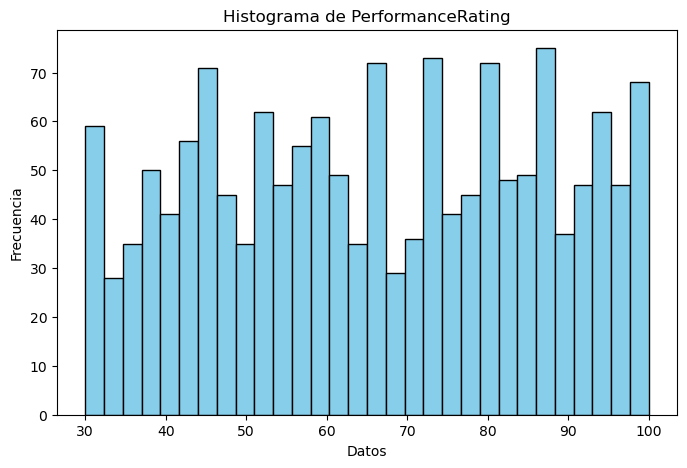

In [9]:
#Creamos la variable h1 para poder generar el histograma:
h1 = df['HourlyRate']

#Utilizamos plt para crearlo:
plt.figure(figsize=(8, 5)) #Definimos el tamaño de la figura.
#Con "dropna" eliminamos los nulos para poder graficar, con "bin" los intervalos y además los colores.
plt.hist(h1.dropna(), bins=30, color='skyblue', edgecolor='black')
#Definimos el título del histograma y sus etiquetas:
plt.title(f'Histograma de PerformanceRating')
plt.xlabel('Datos')
plt.ylabel('Frecuencia')
#Mostramos el gráfico:
plt.show()

**CONCLUSIÓN**: Tras visualizar la columna "_HourlyRate_", concluímos que la **distribución es asimétrica**. Por tanto, imputaremos con la mediana.

In [10]:
#Creamos una variable que nos calcula la mediana para después poder aplicar fillna:
medianah1= df['HourlyRate'].median()
#Aplicamos fillna:
df['HourlyRate'] = df['HourlyRate'].fillna(medianah1)
#Cambiamos el tipo de dato:
df['HourlyRate'] = df['HourlyRate'].astype(int)
#Nos aseguramos de que se ha realizado correctamente:
print(f'El porcentaje de nulos en HourlyRate ahora es: {df["HourlyRate"].isnull().sum()/df.shape[0]*100}.')
print(f'El tipo de dato ahora es: {df["HourlyRate"].dtype}.')
print(f'Sus valores únicos son: {df["HourlyRate"].unique()}')

El porcentaje de nulos en HourlyRate ahora es: 0.0.
El tipo de dato ahora es: int64.
Sus valores únicos son: [ 51  65  58  82  45  99  91  64  55  68  49  61  79  31  69  48  80  74
  98  59  33  56  66  57  53  87  81  84  32  41  92  47  43  86  30  42
  88  96  67  62  72  78  89  52  50  90  37  94  76  60  46  83 100  40
  97  54  75  39  85  63  44  93  36  35  73  71  70  38  77  95  34]


#### 2.1.2. _"Monthly_Income"_

In [11]:
print(f'El tipo de dato de MonthlyIncome es: {df["MonthlyIncome"].dtype}.')
print(f'Su porcentaje de nulos redondeado a dos decimales es: {(df["MonthlyIncome"].isnull().sum()/df.shape[0]*100).round(2)}%.')
if (df["MonthlyIncome"].isnull().sum()/df.shape[0]*100).round(2) > 15:
    print(f'Al ser un porcentaje alto de nulos imputaremos con técnicas avanzadas.')
else:
    print(f'Al ser un porcentaje bajo de nulos haremos un histograma para saber cómo imputarlos.')
print(f'Sus valores únicos son: {df["MonthlyIncome"].unique}')

El tipo de dato de MonthlyIncome es: object.
Su porcentaje de nulos redondeado a dos decimales es: 52.23%.
Al ser un porcentaje alto de nulos imputaremos con técnicas avanzadas.
Sus valores únicos son: <bound method Series.unique of 0       19537,0
1       19999,0
2       19232,0
3       17169,0
4           NaN
         ...   
1609    10325,0
1610     4447,0
1611        NaN
1612        NaN
1613    10845,0
Name: MonthlyIncome, Length: 1614, dtype: object>


In [12]:
#Rellenamos los nulos con '999' para poder cambiar el tipo de dato:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna('999')
#Limpiamos por si hubiera espacios extra:
df['MonthlyIncome'] = df['MonthlyIncome'].str.strip()
#Cambiamos la "," por un "." y el tipo de dato:
df['MonthlyIncome'] = df['MonthlyIncome'].str.replace(",", ".", regex=False).astype(float)
#Volvemos a cambiar el '999' por 'NaN' para poder usar KNN.
df['MonthlyIncome'] = df['MonthlyIncome'].replace(999, np.nan)
#Mostramos el cambio de tipo de dato y el porcentaje de nulos:
print(f'El tipo de dato de MonthlyIncome ahora es: {df["MonthlyIncome"].dtype}.')
print(f'Su porcentaje de nulos es: {(df["MonthlyIncome"].isnull().sum()/df.shape[0]*100).round(2)}%.')

El tipo de dato de MonthlyIncome ahora es: float64.
Su porcentaje de nulos es: 52.23%.


In [13]:
#Utilizamos KNN para tratar los nulos:
imputer_knn = KNNImputer(n_neighbors=5)
df['MonthlyIncome'] = imputer_knn.fit_transform(df[['MonthlyIncome']])
#Mostramos el resultado:
print(f'El porcentaje de nulos después de KNN es: {(df["MonthlyIncome"].isnull().sum()/df.shape[0]*100).round(2)}%.')
print(f'Sus valores únicos son: {df["MonthlyIncome"].unique}')

El porcentaje de nulos después de KNN es: 0.0%.
Sus valores únicos son: <bound method Series.unique of 0       19537.000000
1       19999.000000
2       19232.000000
3       17169.000000
4        6477.686122
            ...     
1609    10325.000000
1610     4447.000000
1611     6477.686122
1612     6477.686122
1613    10845.000000
Name: MonthlyIncome, Length: 1614, dtype: float64>


#### 2.1.2. _"Performance_Rating"_

In [14]:
print(f'El tipo de dato de PerformanceRating es: {df["PerformanceRating"].dtype}.')
print(f'Su porcentaje de nulos redondeado a dos decimales es: {(df["PerformanceRating"].isnull().sum()/df.shape[0]*100).round(2)}%.')
if (df["PerformanceRating"].isnull().sum()/df.shape[0]*100).round(2) > 15:
    print(f'Al ser un porcentaje alto de nulos imputaremos con técnicas avanzadas.')
else:
    print(f'Al ser un porcentaje bajo de nulos haremos un histograma para saber cómo imputarlos.')
print(f'Sus valores únicos son: {df["PerformanceRating"].unique()}')

El tipo de dato de PerformanceRating es: object.
Su porcentaje de nulos redondeado a dos decimales es: 12.08%.
Al ser un porcentaje bajo de nulos haremos un histograma para saber cómo imputarlos.
Sus valores únicos son: ['3,0' '4,0' nan]


In [15]:
#Rellenamos los nulos con '999' para poder cambiar el tipo de dato después:
df['PerformanceRating'] = df['PerformanceRating'].fillna('999')
#Cambiamos la "," por un "." y el tipo de dato (debe ser float) para poder hacer el histograma:
df['PerformanceRating'] = df['PerformanceRating'].str.replace(",", ".", regex=False).astype(float)
#Volvemos a cambiar el '999' por 'NaN' para que lo detecte como nulo a la hora de hacer el histograma:
df['PerformanceRating'] = df['PerformanceRating'].replace(999, np.nan)
#Nos aseguramos de que todo se ha aplicado correctamente:
print(f'El tipo de dato ahora es: {df["PerformanceRating"].dtype}.')
print(f'Su porcentaje de nulos es: {(df["PerformanceRating"].isnull().sum()/df.shape[0]*100).round(2)}%.')
print(f'Sus valores únicos son: {df["PerformanceRating"].unique()}')

El tipo de dato ahora es: float64.
Su porcentaje de nulos es: 12.08%.
Sus valores únicos son: [ 3.  4. nan]


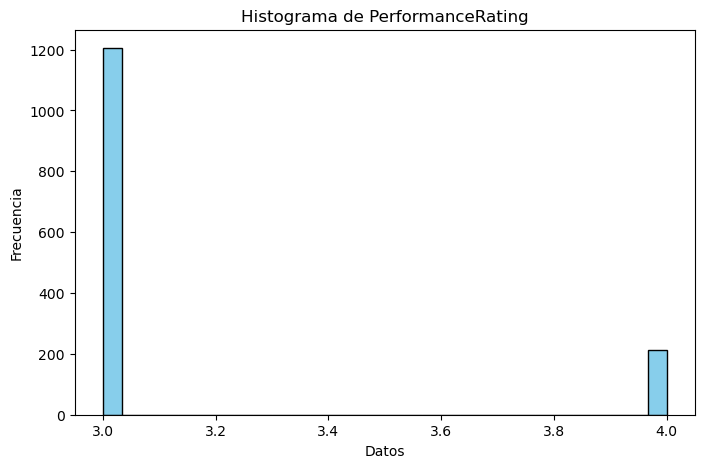

In [16]:
#Creamos la variable h2 para generar el histograma:
h2 = df['PerformanceRating']

#Utilizamos plt para crearlo:
plt.figure(figsize=(8, 5)) #Definimos el tamaño de la figura.
#Con "dropna" eliminamos los nulos para poder graficar, con "bin" los intervalos y además los colores.
plt.hist(h2.dropna(), bins=30, color='skyblue', edgecolor='black')
#Definimos el título del histograma y sus etiquetas:
plt.title(f'Histograma de PerformanceRating')
plt.xlabel('Datos')
plt.ylabel('Frecuencia')
#Mostramos el gráfico:
plt.show()

**CONCLUSIÓN:** Tras la visualización de la columna _"Performance_Rating"_, concluímos que la **distribución es asimétrica**. Por tanto, imputamos con la mediana.

In [17]:
#Creamos una variable que nos calcula la mediana para después poder aplicar fillna:
medianah2= df['PerformanceRating'].median()
df['PerformanceRating'] = df['PerformanceRating'].fillna(medianah2)
#Cambiamos el tipo de dato:
df['PerformanceRating'] = df['PerformanceRating'].astype(int)
#Nos aseguramos de que se ha realizado correctamente:
print(f'El porcentaje de nulos en PerformanceRating ahora es: {df['PerformanceRating'].isnull().sum()/df.shape[0]*100}.')
print(f'El tipo de dato ahora es: {df["PerformanceRating"].dtype}.')
print(f'Sus valores únicos son: {df["PerformanceRating"].unique()}')

El porcentaje de nulos en PerformanceRating ahora es: 0.0.
El tipo de dato ahora es: int64.
Sus valores únicos son: [3 4]


#### 2.1.4. _"Total_Working_Years"_

In [18]:
print(f'El tipo de dato de TOTALWORKINGYEARS es: {df["TOTALWORKINGYEARS"].dtype}.')
print(f'Su porcentaje de nulos redondeado a dos decimales: {(df["TOTALWORKINGYEARS"].isnull().sum()/df.shape[0]*100).round(2)}%.')
if (df["TOTALWORKINGYEARS"].isnull().sum()/df.shape[0]*100).round(2) > 15:
    print(f'Al ser un porcentaje alto de nulos imputaremos con técnicas avanzadas.')
else:
    print(f'Al ser un porcentaje bajo de nulos haremos un histograma para saber cómo imputarlos.')
print(f'Sus valores únicos son:')
print(df["TOTALWORKINGYEARS"].unique())

El tipo de dato de TOTALWORKINGYEARS es: object.
Su porcentaje de nulos redondeado a dos decimales: 32.59%.
Al ser un porcentaje alto de nulos imputaremos con técnicas avanzadas.
Sus valores únicos son:
[nan '34,0' '22,0' '28,0' '20,0' '21,0' '33,0' '40,0' '18,0' '25,0' '15,0'
 '17,0' '26,0' '16,0' '24,0' '14,0' '23,0' '27,0' '19,0' '11,0' '38,0'
 '37,0' '13,0' '12,0' '29,0' '10,0' '36,0' '35,0' '9,0' '31,0' '32,0'
 '8,0' '7,0' '30,0' '6,0' '5,0' '4,0' '3,0' '2,0' '1,0' '0,0']


In [19]:
#Rellenamos los nulos con '999' para poder cambiar el tipo de dato después:
df['TOTALWORKINGYEARS'] = df['TOTALWORKINGYEARS'].fillna('999')
#Limpiamos por si hubiera espacios extra:
df['TOTALWORKINGYEARS'] = df['TOTALWORKINGYEARS'].str.strip()
#Cambiamos la "," por un "." y el tipo de dato:
df['TOTALWORKINGYEARS'] = df['TOTALWORKINGYEARS'].str.replace(",", ".", regex=False).astype(float)
#Nos aseguramos de que todo se ha hecho:
print(f'El tipo de dato de TOTALWORKINGYEARS ahora es: {df["TOTALWORKINGYEARS"].dtype}.')
#Volvemos a cambiar el '999' por 'NaN' para que lo detecte como nulo a la hora de usar KNN:
df["TOTALWORKINGYEARS"] = df["TOTALWORKINGYEARS"].replace(999, np.nan)
print(f'Su porcentaje de nulos es: {(df["TOTALWORKINGYEARS"].isnull().sum()/df.shape[0]*100).round(2)}%.')

El tipo de dato de TOTALWORKINGYEARS ahora es: float64.
Su porcentaje de nulos es: 32.59%.


In [20]:
#Utilizamos KNN para tratar los nulos:
imputer_knn = KNNImputer(n_neighbors=5)
df['TOTALWORKINGYEARS'] = imputer_knn.fit_transform(df[['TOTALWORKINGYEARS']])
#Mostramos el resultado:
print(f'El porcentaje de nulos después de KNN es: {(df["MonthlyIncome"].isnull().sum()/df.shape[0]*100).round(2)}%.')
print(f'Sus valores únicos son: {df["MonthlyIncome"].unique}')

El porcentaje de nulos después de KNN es: 0.0%.
Sus valores únicos son: <bound method Series.unique of 0       19537.000000
1       19999.000000
2       19232.000000
3       17169.000000
4        6477.686122
            ...     
1609    10325.000000
1610     4447.000000
1611     6477.686122
1612     6477.686122
1613    10845.000000
Name: MonthlyIncome, Length: 1614, dtype: float64>


#### 2.2.5. _"Work_Life_Balance"_

In [21]:
print(f'El tipo de dato de WORKLIFEBALANCE es: {df["WORKLIFEBALANCE"].dtype}.')
print(f'Su porcentaje de nulos redondeado a dos decimales es: {(df["WORKLIFEBALANCE"].isnull().sum()/df.shape[0]*100).round(2)}%.')
if (df["WORKLIFEBALANCE"].isnull().sum()/df.shape[0]*100).round(2) > 15:
    print(f'Al ser un porcentaje alto de nulos imputaremos con técnicas avanzadas.')
else:
    print(f'Al ser un porcentaje bajo de nulos haremos un histograma para saber cómo imputarlos.')
print(f'Sus valores únicos son: {df["WORKLIFEBALANCE"].unique()}')

El tipo de dato de WORKLIFEBALANCE es: object.
Su porcentaje de nulos redondeado a dos decimales es: 6.69%.
Al ser un porcentaje bajo de nulos haremos un histograma para saber cómo imputarlos.
Sus valores únicos son: ['3,0' nan '2,0' '4,0' '1,0']


In [22]:
#Rellenamos los nulos con '999' para poder cambiar el tipo de dato después:
df['WORKLIFEBALANCE'] = df['WORKLIFEBALANCE'].fillna('999')
#Cambiamos la "," por un "." y el tipo de dato (debe ser float) para poder hacer el histograma:
df['WORKLIFEBALANCE'] = df['WORKLIFEBALANCE'].str.replace(",", ".", regex=False).astype(float)
#Volvemos a cambiar el '999' por 'NaN' para que lo detecte como nulo a la hora de hacer el histograma.
df['WORKLIFEBALANCE'] = df['WORKLIFEBALANCE'].replace(999, np.nan)
#Nos aseguramos de que todo se ha aplicado correctamente:
print(f'El tipo de dato ahora es: {df["WORKLIFEBALANCE"].dtype}.')
print(f'Su porcentaje de nulos es: {(df["WORKLIFEBALANCE"].isnull().sum()/df.shape[0]*100).round(2)}%.')
print(f'Sus valores únicos son:{df["WORKLIFEBALANCE"].unique()}')

El tipo de dato ahora es: float64.
Su porcentaje de nulos es: 6.69%.
Sus valores únicos son:[ 3. nan  2.  4.  1.]


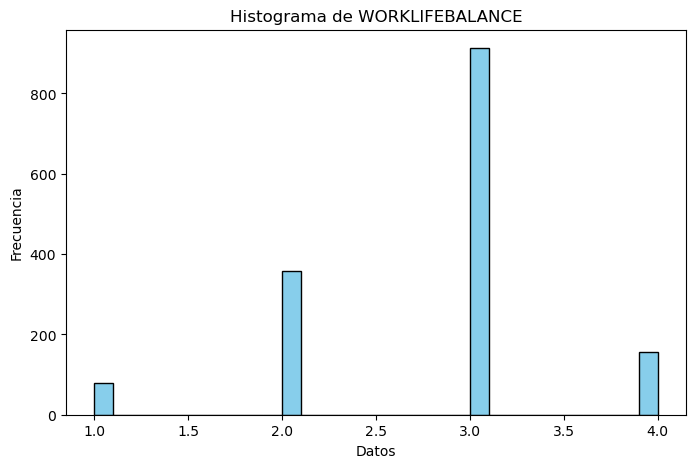

In [23]:
#Creamos la variable h3 para generar el histograma:
h3 = df['WORKLIFEBALANCE']

#Utilizamos plt para crearlo:
plt.figure(figsize=(8, 5)) #Definimos el tamaño de la figura.
#Con "dropna" eliminamos los nulos para poder graficar, con "bin" los intervalos y además los colores.
plt.hist(h3.dropna(), bins=30, color='skyblue', edgecolor='black')
#Definimos el título del histograma y sus etiquetas:
plt.title(f'Histograma de WORKLIFEBALANCE')
plt.xlabel('Datos')
plt.ylabel('Frecuencia')
#Mostramos el gráfico:
plt.show()

**CONCLUSIÓN:** Tras la visualización de la columna _"Performance_Rating"_, concluímos que la **distribución es asimétrica**. Por tanto, imputamos con la mediana.

In [24]:
#Creamos una variable que calcula la mediana para después poder aplicar fillna:
medianah3= df['WORKLIFEBALANCE'].median()
df['WORKLIFEBALANCE'] = df['WORKLIFEBALANCE'].fillna(medianah3)
#Cambiamos el tipo de dato:
df['WORKLIFEBALANCE'] = df['WORKLIFEBALANCE'].astype(int)
#Nos aseguramos de que se ha realizado correctamente:
print(f'El porcentaje de nulos en WORKLIFEBALANCE ahora es: {df['WORKLIFEBALANCE'].isnull().sum()/df.shape[0]*100}.')
print(f'El tipo de dato ahora es: {df["WORKLIFEBALANCE"].dtype}.')
print(f'Sus valores únicos son: {df["WORKLIFEBALANCE"].unique()}')

El porcentaje de nulos en WORKLIFEBALANCE ahora es: 0.0.
El tipo de dato ahora es: int64.
Sus valores únicos son: [3 2 4 1]


### 2.2. Categóricas

#### 2.2.1. _"Business_Travel"_

In [25]:
print(f'El tipo de dato de BusinessTravel es: {df["BusinessTravel"].dtype}.')
print(f'Su porcentaje de nulos redondeado a dos decimales: {(df["BusinessTravel"].isnull().sum()/df.shape[0]*100).round(2)}%.')
if (df["BusinessTravel"].isnull().sum()/df.shape[0]*100).round(2) > 15:
    print('Obtenemos un porcentaje alto de nulos. Procederemos a observar si hay una categoría dominante:')
    print('-Sí hay una categoría dominante --> imputaremos con la moda.')
    print('-No hay catergoría dominante -->  KNN.')
else:
    print('Obtenemos un porcentaje bajo de nulos. Procederemos a observar si hay una categoría dominante:')
    print('-Sí hay una categoría dominante --> imputaremos con la moda.')
    print('-No hay catergoría dominante -->  crearemos una nueva categoría.')
print("Sus valores únicos:")
df["BusinessTravel"].value_counts().to_frame()

El tipo de dato de BusinessTravel es: object.
Su porcentaje de nulos redondeado a dos decimales: 47.83%.
Obtenemos un porcentaje alto de nulos. Procederemos a observar si hay una categoría dominante:
-Sí hay una categoría dominante --> imputaremos con la moda.
-No hay catergoría dominante -->  KNN.
Sus valores únicos:


,count
BusinessTravel,
travel_rarely,586
travel_frequently,165
non-travel,91


In [26]:
#Observamos una clara dominancia de "travel_rarely" --> imputamos con la moda.
#Creamos una variable que contenga la moda:
moda_business_travel = df['BusinessTravel'].mode()[0]
#Rellenamos usando fillna con la variable creada:
df['BusinessTravel'] = df['BusinessTravel'].fillna(moda_business_travel)
#Revisamos que se haya apliado correctamente:
print(f'El porcentaje de nulos ahora es: {(df["BusinessTravel"].isnull().sum()/df.shape[0]*100)}%.')
print(f'Su conteo de valores final: {df["BusinessTravel"].unique()}')

El porcentaje de nulos ahora es: 0.0%.
Su conteo de valores final: ['travel_rarely' 'travel_frequently' 'non-travel']


#### 2.2.2. _"Education_Field"_

In [27]:
print(f'El tipo de dato de EducationField es: {df["EducationField"].dtype}.')
print(f'Su porcentaje de nulos redondeado a dos decimales: {(df["EducationField"].isnull().sum()/df.shape[0]*100).round(2)}%.')
if (df["EducationField"].isnull().sum()/df.shape[0]*100).round(2) > 15:
    print('Obtenemos un porcentaje alto de nulos. Procederemos a observar si hay una categoría dominante:')
    print('-Sí hay una categoría dominante --> imputaremos con la moda.')
    print('-No hay catergoría dominante -->  KNN.')
else:
    print('Obtenemos un porcentaje bajo de nulos. Procederemos a observar si hay una categoría dominante:')
    print('-Sí hay una categoría dominante --> imputaremos con la moda.')
    print('-No hay catergoría dominante -->  crearemos una nueva categoría.')
print(f'Sus valores únicos:\n {df["EducationField"].unique()}')

El tipo de dato de EducationField es: object.
Su porcentaje de nulos redondeado a dos decimales: 46.16%.
Obtenemos un porcentaje alto de nulos. Procederemos a observar si hay una categoría dominante:
-Sí hay una categoría dominante --> imputaremos con la moda.
-No hay catergoría dominante -->  KNN.
Sus valores únicos:
 [nan 'Life Sciences' 'Technical Degree' 'Medical' 'Other' 'Marketing'
 'Human Resources']


**CONCLUSIÓN:** Al no haber categoría dominante, se debería crear una nueva categoría. No obstante, decidimos imputar con KNN para obtener datos más precisos sean más precisos.

In [28]:
#Nos aseguramos de que 'nan' sea la representación estandard 'NaN':
df['EducationField'] = df['EducationField'].replace('nan', 'NaN')


# Convertimos categorías a números usando factorize:
df['EducationField_encoded'], categorias = pd.factorize(df['EducationField'])

#Convertimos los -1 (NaN) en NaN reales para la imputación:
df.loc[df['EducationField'].isnull(), 'EducationField_encoded'] = np.nan

#Aplicamos KNNImputer:
imputer_knn = KNNImputer(n_neighbors=5)
df['EducationField_encoded'] = imputer_knn.fit_transform(df[['EducationField_encoded']])

#Convertimos de nuevo a categorías originales:
df['EducationField'] = df['EducationField_encoded'].round().astype(int)  #Aseguramos que sean números enteros.
df['EducationField'] = df['EducationField'].map(lambda x: categorias[x] if x < len(categorias) else 'Desconocido')

#Eliminamos la columna temporal:
df.drop(columns=['EducationField_encoded'], inplace=True)

#Verificamos el resultado:
print(f'El porcentaje de nulos después de KNN es: {(df["EducationField"].isnull().sum() / df.shape[0] * 100).round(2)}%.')
print('Y sus valores únicos son:')
df['EducationField'].value_counts().to_frame()

El porcentaje de nulos después de KNN es: 0.0%.
Y sus valores únicos son:


,count
EducationField,
Technical Degree,814
Life Sciences,349
Medical,276
Marketing,104
Other,59
Human Resources,12


#### 2.2.3. _"Marital_Status"_

In [29]:
print(f'El tipo de dato de MaritalStatus es: {df["MaritalStatus"].dtype}.')
print(f'Su porcentaje de nulos redondeado a dos decimales: {(df["MaritalStatus"].isnull().sum()/df.shape[0]*100).round(2)}%.')
if (df["MaritalStatus"].isnull().sum()/df.shape[0]*100).round(2) > 15:
    print('Obtenemos un porcentaje alto de nulos. Procederemos a observar si hay una categoría dominante:')
    print('-Sí hay una categoría dominante --> imputaremos con la moda.')
    print('-No hay catergoría dominante -->  KNN.')
else:
    print('Obtenemos un porcentaje bajo de nulos. Procederemos a observar si hay una categoría dominante:')
    print('-Sí hay una categoría dominante --> imputaremos con la moda.')
    print('-No hay catergoría dominante -->  crearemos una nueva categoría.')
print("Sus valores únicos:")
df["MaritalStatus"].value_counts().to_frame()

El tipo de dato de MaritalStatus es: object.
Su porcentaje de nulos redondeado a dos decimales: 40.33%.
Obtenemos un porcentaje alto de nulos. Procederemos a observar si hay una categoría dominante:
-Sí hay una categoría dominante --> imputaremos con la moda.
-No hay catergoría dominante -->  KNN.
Sus valores únicos:


,count
MaritalStatus,
Married,404
Single,325
Divorced,188
Marreid,35
divorced,11


**CONCLUSIÓN:** Al no haber categoría dominante, se debería crear una nueva categoría. No obstante, decidimos imputar con KNN para obtener datos más precisos sean más precisos.

In [30]:
#Para que KNN pueda ejecutarse correctamente debemos corregir los errores gramaticales:
df['MaritalStatus'] = df['MaritalStatus'].replace('Marreid', 'Married')
df['MaritalStatus'] = df['MaritalStatus'].replace('divorced', 'Divorced')
df['MaritalStatus'] = df['MaritalStatus'].replace('nan', 'NaN')
print(f'Ahora los valores únicos de MaritalStatus son: {df["MaritalStatus"].unique()}')

Ahora los valores únicos de MaritalStatus son: [nan 'Married' 'Divorced' 'Single']


In [31]:
#Convertimos categorías a números usando factorize:
df['MaritalStatus_encoded'], categorias = pd.factorize(df['MaritalStatus'])

#Convertimos los -1 (NaN) en NaN reales para la imputación:
df.loc[df['MaritalStatus'].isnull(), 'MaritalStatus_encoded'] = np.nan

#Aplicamos KNNImputer:
imputer_knn = KNNImputer(n_neighbors=5)
df['MaritalStatus_encoded'] = imputer_knn.fit_transform(df[['MaritalStatus_encoded']])

#Convertimos de nuevo a categorías originales:
df['MaritalStatus'] = df['MaritalStatus_encoded'].round().astype(int)  #Aseguramos que sean números enteros.
df['MaritalStatus'] = df['MaritalStatus'].map(lambda x: categorias[x] if x < len(categorias) else 'Desconocido')

#Eliminamos la columna temporal:
df.drop(columns=['MaritalStatus_encoded'], inplace=True)

#Verificamos el resultado:
print(f'El porcentaje de nulos después de KNN es: {(df["MaritalStatus"].isnull().sum() / df.shape[0] * 100).round(2)}%.')
print("Sus valores únicos:")
df["MaritalStatus"].value_counts().to_frame()

El porcentaje de nulos después de KNN es: 0.0%.
Sus valores únicos:


,count
MaritalStatus,
Divorced,850
Married,439
Single,325


#### 2.2.4. _"Overtime"_

In [32]:
print(f'El tipo de dato de OverTime es: {df["OverTime"].dtype}.')
print(f'Su porcentaje de nulos redondeado a dos decimales: {(df["OverTime"].isnull().sum()/df.shape[0]*100).round(2)}%.')
if (df["OverTime"].isnull().sum()/df.shape[0]*100).round(2) > 15:
    print('Obtenemos un porcentaje alto de nulos. Procederemos a observar si hay una categoría dominante:')
    print('-Sí hay una categoría dominante --> imputaremos con la moda.')
    print('-No hay catergoría dominante -->  KNN.')
else:
    print('Obtenemos un porcentaje bajo de nulos. Procederemos a observar si hay una categoría dominante:')
    print('-Sí hay una categoría dominante --> imputaremos con la moda.')
    print('-No hay catergoría dominante -->  crearemos una nueva categoría.')
print(f'Sus valores únicos:{df['OverTime'].unique()}')

El tipo de dato de OverTime es: object.
Su porcentaje de nulos redondeado a dos decimales: 41.88%.
Obtenemos un porcentaje alto de nulos. Procederemos a observar si hay una categoría dominante:
-Sí hay una categoría dominante --> imputaremos con la moda.
-No hay catergoría dominante -->  KNN.
Sus valores únicos:['No' nan 'Yes']


**CONCLUSIÓN:** Al no haber categoría dominante, se debería crear una nueva categoría. No obstante, decidimos imputar con KNN para obtener datos más precisos sean más precisos.

In [33]:
#Nos aseguramos de que 'nan' sea la representación estandard 'NaN':
df['OverTime'] = df['OverTime'].replace('nan', 'NaN')


#Convertimos categorías a números usando factorize:
df['OverTime_encoded'], categorias = pd.factorize(df['OverTime'])

#Convertimos los -1 (NaN) en NaN reales para la imputación:
df.loc[df['OverTime'].isnull(), 'OverTime_encoded'] = np.nan

#Aplicamos KNNImputer:
imputer_knn = KNNImputer(n_neighbors=5)
df['OverTime_encoded'] = imputer_knn.fit_transform(df[['OverTime_encoded']])

#Convertimos de nuevo a categorías originales:
df['OverTime'] = df['OverTime_encoded'].round().astype(int)  #Aseguramos que sean números enteros.
df['OverTime'] = df['OverTime'].map(lambda x: categorias[x] if x < len(categorias) else 'Desconocido')

#Eliminamos la columna temporal:
df.drop(columns=['OverTime_encoded'], inplace=True)

#Verificamos el resultado:
print(f'El porcentaje de nulos después de KNN es: {(df["OverTime"].isnull().sum() / df.shape[0] * 100).round(2)}%.')
print("Sus valores únicos:")
print(df['OverTime'].value_counts().to_frame())

El porcentaje de nulos después de KNN es: 0.0%.
Sus valores únicos:
          count
OverTime       
No         1358
Yes         256


##### NOTA: La columna 'employeenumber' será tratada tras la gestión del columnas.

## **3. Estructura del dataframe**

### 3.1. Modificación de las columnas

In [34]:
#Modificamos todas las columnas de manera que la primera letra sea mayúscula:
df.columns = [col.title() for col in df.columns]
#Renombramos 'Gender' por 'Sex':
df.rename(columns = {'Gender': 'Sex'}, inplace = True)
#Revisamos los cambios:
df.columns

Index(['Age', 'Attrition', 'Businesstravel', 'Distancefromhome', 'Education',
       'Educationfield', 'Employeenumber', 'Environmentsatisfaction', 'Sex',
       'Hourlyrate', 'Jobinvolvement', 'Joblevel', 'Jobrole',
       'Jobsatisfaction', 'Maritalstatus', 'Monthlyincome', 'Monthlyrate',
       'Numcompaniesworked', 'Overtime', 'Percentsalaryhike',
       'Performancerating', 'Relationshipsatisfaction', 'Stockoptionlevel',
       'Totalworkingyears', 'Trainingtimeslastyear', 'Worklifebalance',
       'Yearsatcompany', 'Yearssincelastpromotion', 'Yearswithcurrmanager',
       'Remotework'],
      dtype='object')

In [35]:
# Creamos un diccionario con los nombres adaptados para su posterior uso en SQL:
nuevos_nombres = {'Businesstravel': 'Business_Travel', 'Distancefromhome':'Distance_From_Home',
                'Educationfield': 'Education_Field', 'Employeenumber' : 'Employee_Number',
                'Environmentsatisfaction' : 'Environment_Satisfaction','Hourlyrate' : 'Hourly_Rate',
                'Jobinvolvement' : 'Job_Involvement', 'Joblevel' : 'Job_Level', 'Jobrole' : 'Job_Role',
                'Jobsatisfaction' : 'Job_Satisfaction', 'Maritalstatus' : 'Marital_Status',
                'Monthlyincome' : 'Monthly_Income','Monthlyrate' : 'Monthly_Rate',
                'Numcompaniesworked' : 'Num_Companies_Worked', 'Percentsalaryhike': 'Percent_Salary_Hike',
                'Performancerating': 'Performance_Rating', 'Relationshipsatisfaction' :'Relationship_Satisfaction',
                'Stockoptionlevel': 'Stock_Option_Level', 'Totalworkingyears': 'Total_Working_Years',
                'Trainingtimeslastyear': 'Training_Times_Last_Year','Worklifebalance' :'Work_Life_Balance',
                'Yearsatcompany' : 'Years_At_Company', 'Yearssincelastpromotion' : 'Years_Since_Last_Promotion',
                'Yearswithcurrmanager' : 'Years_With_Curr_Manager', 'Remotework' : 'Remote_Work',
                }

#Aplicamos el cambio:
df.rename(columns=nuevos_nombres,inplace=True)
#Comprobamos la aplicación:
df.columns

Index(['Age', 'Attrition', 'Business_Travel', 'Distance_From_Home',
       'Education', 'Education_Field', 'Employee_Number',
       'Environment_Satisfaction', 'Sex', 'Hourly_Rate', 'Job_Involvement',
       'Job_Level', 'Job_Role', 'Job_Satisfaction', 'Marital_Status',
       'Monthly_Income', 'Monthly_Rate', 'Num_Companies_Worked', 'Overtime',
       'Percent_Salary_Hike', 'Performance_Rating',
       'Relationship_Satisfaction', 'Stock_Option_Level',
       'Total_Working_Years', 'Training_Times_Last_Year', 'Work_Life_Balance',
       'Years_At_Company', 'Years_Since_Last_Promotion',
       'Years_With_Curr_Manager', 'Remote_Work'],
      dtype='object')

### 3.2. Modificación del dato

#### 3.2.1. Cambio del tipo

In [36]:
#Revisamos la columna 'Age':
print(f'El tipo de dato de Age es: {df["Age"].dtype}.')
df['Age'].value_counts().to_frame().T

El tipo de dato de Age es: object.


Age,35,34,31,29,36,32,38,30,33,40,27,37,28,42,45,41,26,39,43,46,44,50,25,24,47,49,55,54,51,53,48,52,56,21,22,23,58,20,59,19,18,60,57,thirty-two,fifty-eight,twenty-six,thirty-seven,thirty-one,thirty,fifty-two,fifty-five,thirty-six,forty-seven,twenty-four
count,84,83,82,78,74,64,64,63,61,60,54,53,53,50,48,46,45,45,40,38,34,31,27,26,26,25,24,20,20,20,20,18,17,16,16,15,14,11,10,9,8,5,5,2,1,1,1,1,1,1,1,1,1,1


In [37]:
#Creamos un diccionario para cambiar las edades escritas en letras y pasarlas a número:
cambiar_edad = {"forty-seven": 47,
    "fifty-eight": 58,
    "thirty-six": 36,
    "fifty-five": 55,
    "fifty-two": 52,
    "thirty-one": 31,
    "thirty": 30,
    "twenty-six": 26,
    "thirty-seven": 37,
    "thirty-two": 32,
    "twenty-four": 24
}
#Aplicamos el cambio:
df["Age"] = df["Age"].replace(cambiar_edad)
#Modificamos el tipo de dato:
df['Age'] = df['Age'].astype(int)
#Comprobamos la aplicación:
print(f'El tipo de dato de Age es: {df["Age"].dtype}.')
df['Age'].value_counts().to_frame().T

El tipo de dato de Age es: int64.


Age,35,31,34,29,36,32,38,30,33,40,27,37,28,42,45,41,26,39,43,46,44,50,24,47,25,55,49,54,51,53,48,52,56,22,21,58,23,20,59,19,18,60,57
count,84,83,83,78,75,66,64,64,61,60,54,54,53,50,48,46,46,45,40,38,34,31,27,27,27,25,25,20,20,20,20,19,17,16,16,15,15,11,10,9,8,5,5


### 3.2.2 Redondear cifras

In [38]:
#Redondeamos a dos decimales:
df['Monthly_Income'] = df['Monthly_Income'].round(2)
df['Total_Working_Years'] = df['Total_Working_Years'].round(2)
#Verificamos el resultado:
print('Los nuevos valores son:')
df[['Monthly_Income', 'Total_Working_Years']].head().T

Los nuevos valores son:


,0,1,2,3,4
Monthly_Income,19537.00,19999.0,19232.0,17169.00,6477.69
Total_Working_Years,11.32,34.0,22.0,11.32,11.32


#### 3.2.3. Correción de errores gramáticales

In [39]:
#Revisamos las filas en las que hemos detectado que hay errores gramaticales o no son uniformes:
df['Business_Travel'].value_counts().to_frame()

,count
Business_Travel,
travel_rarely,1358
travel_frequently,165
non-travel,91


In [40]:
df['Job_Role'].value_counts().to_frame().T

Job_Role,mANager,ManageR,ManagEr,mAnaGeR,MANAgER,mAnageR,MAnagEr,maNaGeR,mAnAGer,MAnagER,mANAgER,MaNAgeR,RESeArCh SCIEntiSt,ManAgEr,MAnAGeR,MaNaGer,manAger,MaNagEr,MAnager,MANagER,ManAGEr,MAnAgeR,MAnAgER,MaNagER,MANAGER,sALeS EXecuTIVe,manAGER,SaLES eXeCUtIVE,MaNuFaCTuring dIRECTOr,ManUFaCTuRiNg dIRECTOR,reSEArcH sCiENTisT,reseARCh SCieNTisT,laBORaTOrY tEChNiCiAn,HeAlthCaRE REPResenTaTIVE,Sales exeCuTive,SAlES execUtiVe,healthCAre rePReseNTatIVe,rESEarcH SCIEnTist,REsEarch SCIenTiST,rEsearch ScIeNTisT,reSEarcH scIENtISt,resEArch DIREcToR,MaNuFaCtUriNG DIrectoR,MANufActURing DIreCtor,sAlEs rEpreSEnTATiVe,ResEARch sCIENTIST,HuMan resoUrCes,heALthCARE RepResentAtIvE,sAlEs REPRESENTATIVe,maNAGeR,LaBoRAToRY TeCHnIciAN,SAleS eXECUTivE,MANuFaCturiNG dIRECTOR,SAles repRESEnTaTivE,reseArCh DIrEcToR,heAlTHCARe REpRESentAtiVE,saLeS eXecutIve,LABoraTorY TeChNiciaN,ReSeARcH SCIentISt,reseArCH scIentISt,sales eXecUTIvE,SAleS eXEcUtiVe,MAnageR,sAles exEcUtIve,sales exEcutiVe,salES RepREsenTAtIvE,labORATory teCHNiCian,SaleS ExECUTIvE,salES ExEcuTIVE,saLeS EXeCuTiVe,rESEArch ScIEnTIst,SalEs EXeCUtIVe,ManUFacTUriNG dirEctOR,ReseARCh ScIEntIsT,Sales EXEcuTive,sales executiVE,MAnUfaCTurinG DirectOR,LaBOratoRy TECHNICiAn,lAboRaToRY teChNICIan,ReseaRch scIENTisT,laBorATorY TeChniCiAN,SaLES REPrEsENTAtivE,REseaRch dIrECtor,laborAtOry tEChnICiAn,rEseArCh scIENtiST,reseARcH sCiEntiST,researCh SCientIsT,ResEARCH scIENTISt,rEseARch ScIEnTIst,MAnufAcTUrinG dIrEcTOr,healTHcARE rEPrEseNtatIve,LaBORatOrY TeChNICiaN,reSeaRCh scIEntist,maNAgEr,lABoRAToRY tECHNICIaN,LAbORatORy TEcHniCIaN,reSEArCH SCiENTIst,HealThcare REpresenTATIve,ManufacTURInG DIRECtOR,sAleS represENtATIVE,rEsEarCH SCIeNtist,hEalthCaRe reprEseNTaTiVe,LaBoRatORy TECHNICian,HUMaN RESourcEs,SAlES exeCutive,labORAtoRy tEcHNICIAN,hUMaN rESoUrCES,rEseaRCh SCIeNtIST,rEsEarcH sCieNTIsT,SALEs RePREsentAtIVe,SaLEs eXEcUtiVe,rEsEaRCh diReCtOR,sALES exEcuTIVe,LAboRATORY TECHNICIaN,SalEs EXecUTIVE,LABoraTOry TECHniCiaN,sALes ExEcUTIVe,rESeARCh scIentiST,heAlthCAre REPResenTaTive,HEALThCARe REPReSENTatIvE,MANuFacturIng DIrectOr,lABOraTory tEchniCiAN,research sCiEntiSt,lABoraTOry TEchniciAN,reseaRCH ScIenTisT,rEseaRch sCieNTIsT,labOrATOry TEchnIcIaN,RESEArch SCIEnTISt,ReSeaRCH ScIEnTISt,lAboRAtoRy TEcHNiCiaN,MAnUfACTurING dirEcTor,lABoratOrY tEcHnICiAN,Sales rePrEsenTaTivE,SAles execUTIve,HEAlTHCarE REPResEnTaTIve,reSearCH sCIentIst,ResEArCH Scientist,rESEARcH scIentIST,ReSeARcH dIreCTor,SALEs EXECuTiVE,SAlES RepreSENtATiVe,rESEarCh dIRECToR,SaleS EXeCutiVe,RESEArCH SciENtIST,sALeS EXEcutive,saLeS RePRESEntatIvE,reseaRCh sCiEnTISt,reSearCh SCIeNtisT,lAboratOrY TeChnICiAn,rEseARCH ScIeNtIST,LAboRATory tEChnicIAN,REsEarcH DIReCTOR,saleS RePreSeNtatIve,SaLEs eXeCUtivE,RESeARch ScIeNtisT,sALES REprEsEntATive,SALeS execUtivE,ResEarch ScIenTIst,resEARCh SCiENTiST,REsEARch sCIenTIsT,hUmaN reSOuRCeS,REseArCH DIrecTOr,HEaLTHcaRE rePrESEntaTivE,ManuFacTURInG DiReCtOr,sAles RePRESEntatIve,huMAn Resources,huMan RESOuRCEs,hUmAN reSOURCEs,reseaRch DIrecTOr,sales rEpRESEnTatIve,rESEARCh scIEntiSt,saLES eXeCutive,hEaLThCAre rEPrEsEntAtIve,reSEaRCH scIenTisT,SaLES ExECUTIVe,Sales EXEcUTiVe,MANager,sAlES exECuTivE,MAnuFaCtUrINg diRECtor,HEaLThcarE RePRESeNtativE,salES rePResEntatIve,researcH ScienTist,RESEARcH sCIENTIsT,HuMan ResOUrces,humaN ReSOurCeS,laboraTory tEcHniciaN,SAlES EXEcUTivE,lAbOrAtoRY tecHniCian,LAbORatory teChnIcIan,sALeS eXECutivE,LAboRAtorY TEcHnician,resEaRcH SCiEnTIst,rESeArcH sCientIST,laBOrATorY tEcHNIciAN,sAleS RePReSEntATIVe,LAborAtory TeCHNICIAN,LaboRAtOry tecHniciAn,manuFacTurING DIrector,Human REsouRCeS,salES ExecUtIve,ResEArch sCIEntIst,rESeArcH sCiEntIsT,SalEs eXEcuTiVE,heAlthCare rePResENtaTIve,LabOratory tecHnICian,saLEs ExEcutIve,SAles exeCUTIvE,sAleS eXeCuTIVE,laBoRaTORY TecHnician,ResEaRch scientIst,mANUFACtURiNg diREctor,LAboratORY TechNIcIaN,RESEArCH ScientIsT,lAbOrATORy tEChNiciAn,lABOrAtOry tEChNician,LaBoRaToRy tEChniciAN,lABOrAToRY TECHnIciAN,sAleS EXeCUtiVe,rESeaRCh ScIentISt,hEalTHc

In [41]:
#Unificamos las tipografías:
df['Job_Role'] = df['Job_Role'].str.title()
df['Business_Travel'] = df['Business_Travel'].str.title()
#Verificamos que se ha aplicado correctamente:
df['Job_Role'].unique(), df['Business_Travel'].unique()

(array([' Research Director ', ' Manager ', ' Sales Executive ',
        ' Manufacturing Director ', ' Research Scientist ',
        ' Healthcare Representative ', ' Laboratory Technician ',
        ' Sales Representative ', ' Human Resources '], dtype=object),
 array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object))

In [42]:
#Reemplazamos los valores que separan las palabras por "_":
df['Business_Travel'] = df['Business_Travel'].replace('Non-Travel', 'Non_Travel')
df['Job_Role'] = df['Job_Role'].str.strip().str.replace(" ", "_", regex=False)
df['Education_Field'] = df['Education_Field'].str.strip().str.replace(" ", "_", regex=False)
#Verificamos que se ha aplicado correctamente:
print(f'Los valores únicos de Job_Role: {df['Job_Role'].unique()}')
print('-' *110)
print(f'Los valores únicos de Business_Travel: {df['Business_Travel'].unique()}')

Los valores únicos de Job_Role: ['Research_Director' 'Manager' 'Sales_Executive' 'Manufacturing_Director'
 'Research_Scientist' 'Healthcare_Representative' 'Laboratory_Technician'
 'Sales_Representative' 'Human_Resources']
--------------------------------------------------------------------------------------------------------------
Los valores únicos de Business_Travel: ['Travel_Rarely' 'Travel_Frequently' 'Non_Travel']


#### 3.2.4. Valores incorrectos

In [43]:
#Detectamos valores negativos en Distance_From_Home.
print(f'Los valores únicos de Distance_From_Home: {df['Distance_From_Home'].unique()}')
#Asumimos que se trata de un error y los cambiamos a positivo.
#Para ello creamos una función:
def positivo(Distance_From_Home):
    if Distance_From_Home < 0:
        return (Distance_From_Home * -1)
    else:
        return Distance_From_Home
#Aplicamos la función:
df['Distance_From_Home'] = df['Distance_From_Home'].apply(positivo)
#Revisamos que se ha realizado el cambio correctamente:
print(f'\nAhora los valores únicos de Distance_From_Home: {df['Distance_From_Home'].unique()}')

Los valores únicos de Distance_From_Home: [  6   1   4   2   3  22  25   9   7  23  10  12  14 -13  15   8 -42  28
 -37   5  16 -35  26 -26  24  29 -25  17  21 -18 -10 -30 -27  20 -31 -29
 -39  18 -21 -15  11  13 -14  19 -33 -34 -46 -36 -19  27 -12 -23 -45 -28
 -47 -32 -24 -16 -22 -41 -49 -11 -48 -38 -20 -17 -43 -40 -44]

Ahora los valores únicos de Distance_From_Home: [ 6  1  4  2  3 22 25  9  7 23 10 12 14 13 15  8 42 28 37  5 16 35 26 24
 29 17 21 18 30 27 20 31 39 11 19 33 34 46 36 45 47 32 41 49 48 38 43 40
 44]


In [44]:
#En Remote_Work hemos detectado distintos valores que significan lo mismo.
print(f'Los valores únicos de Remote_Work: {df['Remote_Work'].unique()}')
#Etendemos que los valores "Yes", "1" y "True" equivalen a "Yes" y los valores "0" y "False" a "No".
#Unificamos todo en "Yes" y "No" creando una función:
def teletrabajo(Remote_Work):
    if Remote_Work in ["Yes", "1", "True"]:
        return "Yes"
    elif Remote_Work in ["0", "False"]:
        return "No"
    return Remote_Work
#Aplicamos la función:
df['Remote_Work'] = df['Remote_Work'].apply(teletrabajo)
#Confirmamos que se ha aplicado correctamente:
print(f'\nAhora valores únicos de Remote_Work: {df['Remote_Work'].unique()}')

Los valores únicos de Remote_Work: ['Yes' '1' 'False' '0' 'True']

Ahora valores únicos de Remote_Work: ['Yes' 'No']


In [45]:
#En la columna 'Sex' sus valores son "0" y "1".
print(f'Los valores únicos de Sex: {df['Sex'].unique()}')
#Es más sencillo visualizar los valores con "Female" y "Male".
#Creamos una función que nos haga el cambio:
def sex(Sex):
    if Sex == 1:
        return "Female"
    else:
        return "Male"
#Aplicamos la función:
df['Sex'] = df['Sex'].apply(sex)
#Confirmamos que se ha aplicado correctamente:
print(f'\nAhora valores únicos de Sex: {df['Sex'].unique()}')

Los valores únicos de Sex: [0 1]

Ahora valores únicos de Sex: ['Male' 'Female']


In [46]:
#Vamos a guardar el csv aunque nos falta por tratar 'Employee_Number'.
df.to_csv("Sin_Employee_Number.csv", index=False)

Generamos de nuevo el csv con todo el trabajo realizado. Como se mencionaba anteriormente, _"Employee_Number"_ será analizado de manera independiente.
Por ello, queda excluído de este primer csv.

## **4. Duplicados**

In [47]:
dfs = pd.read_csv("Sin_Employee_Number.csv")

In [48]:
#Sospechamos que existen duplicados al haber imputado el resto de filas.
print(f'En el nuevo csv tenemos: {dfs.duplicated().sum()} duplicados.')
#Hacemos la siguiente condición:
if dfs.duplicated().sum() > 0:
    dfs.drop_duplicates(inplace=True)
    print(f'Que ya han sido eliminados.')
else:
    print(f'Enhorabuena: no tienes duplicados en tu csv.')

En el nuevo csv tenemos: 51 duplicados.
Que ya han sido eliminados.


## 5. "_Employee_Number"_

Identificamos esta columna como un id de empleados. Por tanto, todos los valores deben ser únicos

In [49]:
#Revisamos tanto los nulos como los duplicados de Employee_Number:
print(f'Los nulos de Employee_Number son: {dfs['Employee_Number'].isnull().sum()}, representan un {(dfs['Employee_Number'].isnull().sum()/dfs.shape[0]*100).round(2)}%.')
print(f'Los duplicados de Employee_Number son: {dfs['Employee_Number'].duplicated().sum()}, lo que representa un {(dfs['Employee_Number'].duplicated().sum()/dfs.shape[0]*100).round(2)}%.')

Los nulos de Employee_Number son: 412, representan un 26.36%.
Los duplicados de Employee_Number son: 483, lo que representa un 30.9%.


**CONCLUSIÓN**: Los nulos reprensentan un pocentaje alto por lo que decidimos imputarlos con valores aleatorios que no interfieran con los datos ya tenemos.

### 5.1. Gestión de nulos y duplicados

In [50]:
#Rellenamos los nulos con '00000' para poder cambiar el tipo de dato y averiguar el máximo:
dfs['Employee_Number'] = dfs['Employee_Number'].fillna('00000')
#Limpiamos por si hubiera espacios extra:
dfs['Employee_Number'] = dfs['Employee_Number'].str.strip()
#Cambiamos la "," por un "." y el tipo de dato:
dfs['Employee_Number'] = dfs['Employee_Number'].str.replace(",", ".", regex=False).astype(float)
#Volvemos a cambiar el '00000' por NaN para poder imputar:
dfs['Employee_Number'] = dfs['Employee_Number'].replace(00000, np.nan)
#Mostramos el cambio de tipo de dato y el porcentaje de nulos:
print(f'El tipo de dato de Employee_Number ahora es: {dfs["Employee_Number"].dtype}.')
print(f'Su porcentaje de nulos es: {(dfs["Employee_Number"].isnull().sum()/dfs.shape[0]*100).round(2)}%.')

El tipo de dato de Employee_Number ahora es: float64.
Su porcentaje de nulos es: 26.36%.


In [51]:
#Primero buscamos el dato de 'Employee_Number' más alto para elegir un rango diferente con el que imputar.
print(f'El valor máximo de Employee_Number es: {dfs['Employee_Number'].max()}.')
#Y volvemos a cambiar el tipo de dato a object para poder imputar:
dfs['Employee_Number'] = dfs['Employee_Number'].astype(object)
#Visualizamos el cambio:
print(f'El tipo de dato de Employee_Number ahora es: {dfs["Employee_Number"].dtype}.')

El valor máximo de Employee_Number es: 2068.0.
El tipo de dato de Employee_Number ahora es: object.


In [52]:
#Creamos una varialbe que cuenta cuántos valores nulos hay:
num_nulos = dfs['Employee_Number'].isna().sum()

#Generamos números aleatorios únicos:
rango_numeros = np.arange(2100, 2600)  #Creamos un rango de valores posibles ya que son 412 nulos.
numeros_aleatorios = np.random.choice(rango_numeros, size=num_nulos, replace=False)  #Especificamos que los valores deben ser únicos.

#Asignamos los números aleatorios pero solo a los nulos:
dfs.loc[dfs['Employee_Number'].isna(), 'Employee_Number'] = numeros_aleatorios.astype(str)

#Volvemos a cambiar el tipo de dato:
dfs['Employee_Number'] = dfs['Employee_Number'].astype(int)

# Revisamos que se ha ejecutado correctamente:
print(f'El tipo de dato ahora es: {dfs["Employee_Number"].dtype}.')
print(f'Ahora el porcentaje de nulos es: {(dfs["Employee_Number"].isnull().sum()/dfs.shape[0]*100).round(2)}%.')

El tipo de dato ahora es: int64.
Ahora el porcentaje de nulos es: 0.0%.


In [53]:
#Revisamos de nuevo los nulos y duplicados:
print(f'Los nulos de Employee_Number son: {dfs['Employee_Number'].isnull().sum()}, representan un {(dfs['Employee_Number'].isnull().sum()/dfs.shape[0]*100).round(2)}%.')
print(f'Los duplicados de Employee_Number son: {dfs['Employee_Number'].duplicated().sum()}, lo que representa un {(dfs['Employee_Number'].duplicated().sum()/dfs.shape[0]*100).round(2)}%.')

Los nulos de Employee_Number son: 0, representan un 0.0%.
Los duplicados de Employee_Number son: 72, lo que representa un 4.61%.


**CONCLUSIONES**
- Observamos falsos duplicados, puesto que la misms paersona aparece varias veces por algún cambio en sus condiciones
- Decidimos no eliminar los datos ya que se consideran relevantes. 

In [54]:
#Guardamos el csv ya tratado.
df.to_csv("Transformando_el_talento_Final.csv", index=False)